<a href="https://colab.research.google.com/github/Arthur-Merlini/Projetos_TA/blob/main/projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Turing USP/dataset/games.csv')

In [ ]:
df.head(10)

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command & Conquer,quando vai ser o churrasturing?,NaN,NaN,AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR...,1-4,aceitas pix,NaN,"Aug 31, 1995",/game/pc/command-conquer,5,0,NaN,94,47,NaN,1,8.9
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,NaN,NaN,NaN,"Apr 30, 1995",/game/pc/full-throttle,6,2,0.0,86,18,1.0,0,8.7
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1-2,T,NaN,"Sep 9, 1995",/game/playstation/battle-arena-toshinden,1,3,0.0,69,1,0.0,1,5.8
3,Sid Meier's Civilization II,PC,MPS Labs,MicroProse,Strategy,1 Player,K-A,NaN,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0.0,94,46,0.0,1,8.9
4,Quake,PC,id Software,id Software,Action,1-16,M,NaN,"Jun 22, 1996",/game/pc/quake,9,0,0.0,94,84,4.0,1,8.8
5,Diablo,pc,Blizzard Entertainment,Blizzard Entertainment,Role-Playing,1-4,M,NaN,"Dec 31, 1996",/game/pc/diablo,12,0,0.0,94,84,8.0,7,8.7
6,Super Mario 64,N64,Nintendo,Nintendo,Action,1 Player,E,NaN,"Sep 26, 1996",/game/nintendo-64/super-mario-64,13,0,0.0,94,220,14.0,10,9.2
7,Wipeout XL,PS,Psygnosis,SCEE,Driving,1-2,NaN,NaN,"Sep 30, 1996",/game/playstation/wipeout-xl,8,0,0.0,93,4,1.0,1,8.5
8,Wave Race 64,N64,Nintendo,Nintendo,Driving,1-2,E,NaN,"Nov 1, 1996",/game/nintendo-64/wave-race-64,12,1,0.0,92,15,2.0,0,8.2
9,Tomb Raider,PS,Core Design Ltd.,Eidos Interactive,Action Adventure,1 Player,T,NaN,"Nov 15, 1996",/game/playstation/tomb-raider,13,0,0.0,91,31,4.0,1,8.4


### Observações iniciais dos dados 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20422 non-null  object 
 1   platform         20422 non-null  object 
 2   developer        20363 non-null  object 
 3   publisher        20392 non-null  object 
 4   genre(s)         20422 non-null  object 
 5   players          13193 non-null  object 
 6   rating           18138 non-null  object 
 7   attribute        324 non-null    object 
 8   release_date     20422 non-null  object 
 9   link             20422 non-null  object 
 10  critic_positive  20422 non-null  int64  
 11  critic_neutral   20422 non-null  int64  
 12  critic_negative  19084 non-null  float64
 13  metascore        20422 non-null  int64  
 14  user_positive    20422 non-null  int64  
 15  user_neutral     20409 non-null  float64
 16  user_negative    20422 non-null  int64  
 17  user_score  

### Trabalhando com dados númericos 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
critic_positive,20422.0,10.807463,14.997891,0.0,1.0,5.0,14.0,118.0
critic_neutral,20422.0,7.237391,7.239200,0.0,2.0,5.0,10.0,60.0
critic_negative,19084.0,1.526043,3.180174,0.0,0.0,0.0,2.0,51.0
metascore,20422.0,68.826902,13.248435,8.0,61.0,71.0,78.0,99.0
user_positive,20422.0,16.880472,71.851614,0.0,1.0,3.0,10.0,3029.0
user_neutral,20409.0,4.609829,16.333626,0.0,0.0,1.0,3.0,507.0
user_negative,20422.0,6.389874,51.877636,0.0,0.0,1.0,3.0,3001.0


In [ ]:
df.critic_negative.isna().sum()

1338

<Figure size 720x576 with 0 Axes>

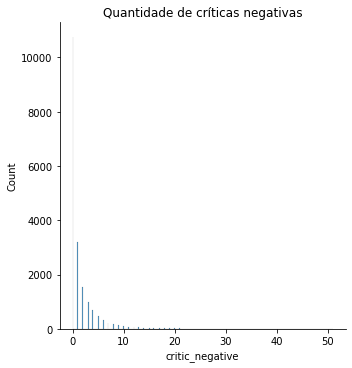

In [ ]:
plt.figure(figsize =(10,8))
sns.displot(x = df['critic_negative'].dropna())
plt.title('Quantidade de críticas negativas')
plt.show()

In [ ]:
df.shape

(20422, 18)

In [ ]:
df.select_dtypes(include = 'number').head()

,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative
0,5,0,NaN,94,47,NaN,1
1,6,2,0.0,86,18,1.0,0
2,1,3,0.0,69,1,0.0,1
3,7,0,0.0,94,46,0.0,1
4,9,0,0.0,94,84,4.0,1


In [ ]:
df_numeric = df.select_dtypes(include = ['float64','int64']) 

In [ ]:
df_numeric.head()

,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative
0,5,0,NaN,94,47,NaN,1
1,6,2,0.0,86,18,1.0,0
2,1,3,0.0,69,1,0.0,1
3,7,0,0.0,94,46,0.0,1
4,9,0,0.0,94,84,4.0,1


In [ ]:
df_numeric.isna().sum()

critic_positive       0
critic_neutral        0
critic_negative    1338
metascore             0
user_positive         0
user_neutral         13
user_negative         0
dtype: int64

### NaNs nas colunas dos numéricos 

In [ ]:
df_numeric['critic_negative'].mode()

0    0.0
dtype: float64

In [ ]:
df_numeric['metascore'].mode()

0    73
dtype: int64

In [ ]:
df['critic_negative'].fillna(df['critic_negative'].mode()[0], inplace = True)

In [ ]:
df.critic_negative.isna().sum()

0

In [ ]:
df.isna().sum()

name                   0
platform               0
developer             59
publisher             30
genre(s)               0
players             7229
rating              2284
attribute          20098
release_date           0
link                   0
critic_positive        0
critic_neutral         0
critic_negative        0
metascore              0
user_positive          0
user_neutral          13
user_negative          0
user_score             0
dtype: int64

In [ ]:
id_user_neutral = df[df['user_neutral'].isna()].index
id_user_neutral

Int64Index([0, 1650, 3300, 4950, 6600, 8250, 9900, 11550, 13200, 14850, 16500,
            18150, 19800],
           dtype='int64')

In [ ]:
df.loc[df['user_neutral'].isna()]

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command & Conquer,quando vai ser o churrasturing?,NaN,NaN,AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR...,1-4,aceitas pix,NaN,"Aug 31, 1995",/game/pc/command-conquer,5,0,0.0,94,47,NaN,1,8.9
1650,NBA Courtside 2002,GC,Left Field Productions,Nintendo,Sports,1-4,E,NaN,"Jan 13, 2002",/game/gamecube/nba-courtside-2002,10,7,0.0,71,5,NaN,1,7.4
3300,Second Sight,GC,Free Radical Design,Codemasters,Action Adventure,1 Player,T,NaN,"Sep 21, 2004",/game/gamecube/second-sight,24,10,0.0,77,5,NaN,0,8.4
4950,Test Drive Unlimited,X360,Eden Studios,Atari,Driving,8 Online,E10+,NaN,"Sep 5, 2006",/game/xbox-360/test-drive-unlimited,62,7,0.0,82,27,NaN,4,8.0
6600,Heatseeker,PS2,IR Gurus,Codemasters,Simulation,1 Player,T,NaN,"May 1, 2007",/game/playstation-2/heatseeker,2,19,0.0,60,2,NaN,1,7.8
8250,EA Sports Active More Workouts,WII,Electronic Arts,Electronic Arts,Sports,NaN,E,NaN,"Nov 17, 2009",/game/wii/ea-sports-active-more-workouts,13,2,0.0,80,0,NaN,0,tbd
9900,WRC: FIA World Rally Championship,X360,Milestone S.r.l,Deep Silver,Driving,NaN,E10+,NaN,"Oct 20, 2010",/game/xbox-360/wrc-fia-world-rally-championship,3,21,0.0,66,1,NaN,0,5.8
11550,Borderlands 2: Mr. Torgue's Campaign of Carnage,pc,Gearbox Software,2K Games,Action,NaN,M,NaN,"Nov 20, 2012",/game/pc/borderlands-2-mr-torgues-campaign-of-...,7,1,0.0,82,7,NaN,0,7.2
13200,How to Survive,X360,EKO Software,505 Games,Action Adventure,NaN,M,NaN,"Oct 23, 2013",/game/xbox-360/how-to-survive,4,13,0.0,59,4,NaN,1,6.4
14850,Life is Strange: Episode 4 - Dark Room,pc,DONTNOD Entertainment,Square Enix,Action Adventure,NaN,M,NaN,"Jul 28, 2015",/game/pc/life-is-strange-episode-4---dark-room,6,3,0.0,76,16,NaN,0,8.6


In [ ]:
df_numeric['user_neutral'].mode()

0    0.0
dtype: float64

In [ ]:
df['user_neutral'].fillna(df['user_neutral'].mode()[0], inplace = True)

In [ ]:
df.user_neutral.isna().sum()

0

In [ ]:
df.isna().sum()

name                   0
platform               0
developer             59
publisher             30
genre(s)               0
players             7229
rating              2284
attribute          20098
release_date           0
link                   0
critic_positive        0
critic_neutral         0
critic_negative        0
metascore              0
user_positive          0
user_neutral           0
user_negative          0
user_score             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20422 non-null  object 
 1   platform         20422 non-null  object 
 2   developer        20363 non-null  object 
 3   publisher        20392 non-null  object 
 4   genre(s)         20422 non-null  object 
 5   players          13193 non-null  object 
 6   rating           18138 non-null  object 
 7   attribute        324 non-null    object 
 8   release_date     20422 non-null  object 
 9   link             20422 non-null  object 
 10  critic_positive  20422 non-null  int64  
 11  critic_neutral   20422 non-null  int64  
 12  critic_negative  20422 non-null  float64
 13  metascore        20422 non-null  int64  
 14  user_positive    20422 non-null  int64  
 15  user_neutral     20422 non-null  float64
 16  user_negative    20422 non-null  int64  
 17  user_score  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
critic_positive,20422.0,10.807463,14.997891,0.0,1.0,5.0,14.0,118.0
critic_neutral,20422.0,7.237391,7.239200,0.0,2.0,5.0,10.0,60.0
critic_negative,20422.0,1.426060,3.097330,0.0,0.0,0.0,2.0,51.0
metascore,20422.0,68.826902,13.248435,8.0,61.0,71.0,78.0,99.0
user_positive,20422.0,16.880472,71.851614,0.0,1.0,3.0,10.0,3029.0
user_neutral,20422.0,4.606895,16.328840,0.0,0.0,1.0,3.0,507.0
user_negative,20422.0,6.389874,51.877636,0.0,0.0,1.0,3.0,3001.0


<Figure size 720x576 with 0 Axes>

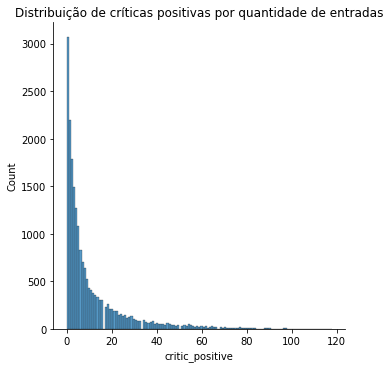

In [ ]:
plt.figure(figsize =(10,8))
sns.displot(x = df['critic_positive'])
plt.title('Distribuição de críticas positivas por quantidade de entradas')
plt.show()

In [ ]:
df['critic_positive'].min()

0

In [ ]:
df['critic_positive'].max()

118

In [ ]:
df['critic_positive'].mode()

0    0
dtype: int64

<Figure size 720x576 with 0 Axes>

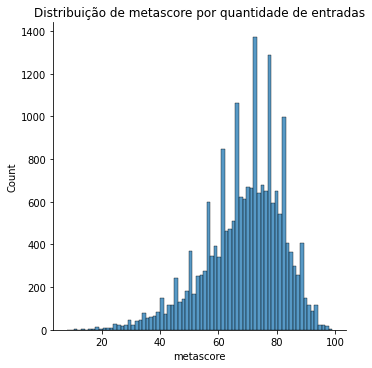

In [ ]:
plt.figure(figsize =(10,8))
sns.displot(x = df['metascore'])
plt.title('Distribuição de metascore por quantidade de entradas')
plt.show()

In [ ]:
df['metascore'].min()

8

In [ ]:
df['metascore'].max()

99

In [ ]:
df['metascore'].mode()

0    73
dtype: int64

In [ ]:
df.describe(include = 'object')

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,user_score
count,20422,20422,20363,20392,20422,13193,18138,324,20422,20422,20422
unique,13246,22,4741,2230,69,53,9,11,4323,20413,91
top,Madden NFL 07,PC,Capcom,Ubisoft,Action,No Online Multiplayer,E,PlayStation VR Required,"Nov 14, 2006",/game/pc/star-wars-battlefront-ii,tbd
freq,10,4372,299,907,7110,3884,5912,75,56,4,2597


### Análise inicial dos dados 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20422 non-null  object 
 1   platform         20422 non-null  object 
 2   developer        20363 non-null  object 
 3   publisher        20392 non-null  object 
 4   genre(s)         20422 non-null  object 
 5   players          13193 non-null  object 
 6   rating           18138 non-null  object 
 7   attribute        324 non-null    object 
 8   release_date     20422 non-null  object 
 9   link             20422 non-null  object 
 10  critic_positive  20422 non-null  int64  
 11  critic_neutral   20422 non-null  int64  
 12  critic_negative  20422 non-null  float64
 13  metascore        20422 non-null  int64  
 14  user_positive    20422 non-null  int64  
 15  user_neutral     20422 non-null  float64
 16  user_negative    20422 non-null  int64  
 17  user_score  

<Figure size 720x576 with 0 Axes>

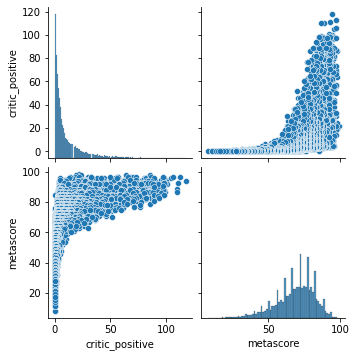

In [ ]:
plt.figure(figsize = (10,8))
sns.pairplot(df[['critic_positive','metascore']])
plt.show()

<Figure size 720x576 with 0 Axes>

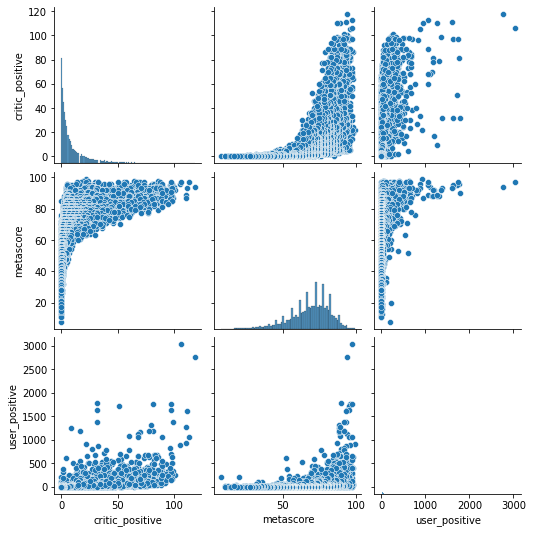

In [ ]:
plt.figure(figsize = (10,8))
sns.pairplot(df[['critic_positive','metascore','user_positive']])
plt.show()

<Figure size 720x576 with 0 Axes>

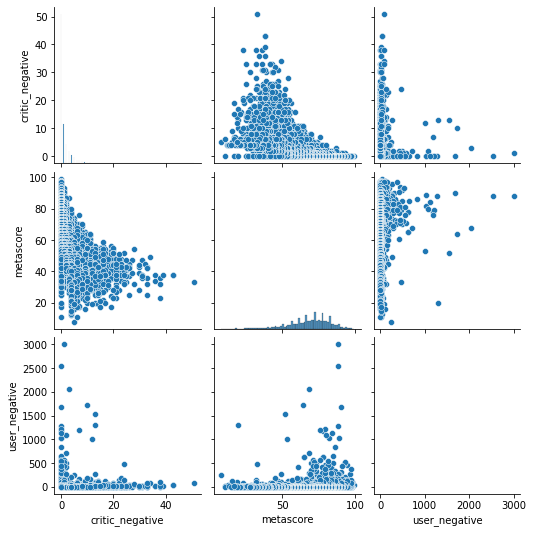

In [ ]:
plt.figure(figsize = (10,8))
sns.pairplot(df[['critic_negative','metascore','user_negative']])
plt.show()

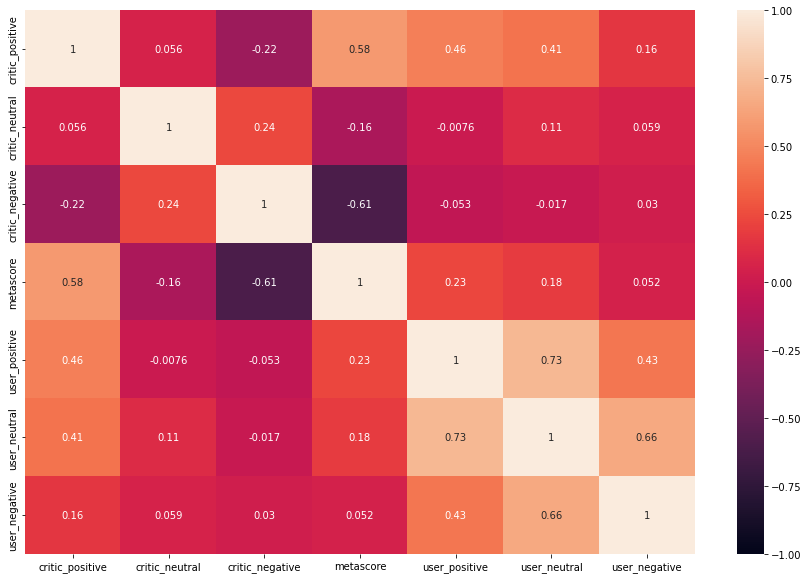

In [ ]:
plt.figure(figsize = (15,10 ))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

#### Top 10 jogos mais bem avaliados pela crítica

In [ ]:
df.sort_values('metascore', ascending = False)

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
61,The Legend of Zelda: Ocarina of Time,N64,Nintendo,Nintendo,Action Adventure,1 Player,E,NaN,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22,0,0.0,99,918,42.0,37,9.1
162,Tony Hawk's Pro Skater 2,PS,Neversoft Entertainment,Activision,Sports,1-2,T,NaN,"Sep 20, 2000",/game/playstation/tony-hawks-pro-skater-2,19,0,0.0,98,41,8.0,5,7.5
6934,Grand Theft Auto IV,X360,Rockstar North,Rockstar Games,Action Adventure,1 Player,M,NaN,"Apr 29, 2008",/game/xbox-360/grand-theft-auto-iv,86,0,0.0,98,630,178.0,106,7.9
6933,Grand Theft Auto IV,PS3,Rockstar North,Rockstar Games,Action Adventure,1 Player,M,NaN,"Apr 29, 2008",/game/playstation-3/grand-theft-auto-iv,64,0,0.0,98,400,142.0,97,7.5
108,SoulCalibur,DC,Namco,Namco,Action,1-2,T,NaN,"Sep 8, 1999",/game/dreamcast/soulcalibur,24,0,0.0,98,65,2.0,1,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,Ride to Hell: Retribution,PS3,"Eutechnyx, Deep Silver",Deep Silver,Driving,No Online Multiplayer,M,NaN,"Jun 25, 2013",/game/playstation-3/ride-to-hell-retribution,0,0,4.0,13,10,1.0,34,1.1
4844,Elf Bowling 1 & 2,DS,Black Lantern Studios,Ignition Entertainment,Sports,1-2,T,NaN,"Dec 1, 2005",/game/ds/elf-bowling-1-2,0,0,4.0,12,2,0.0,10,2.6
12397,Family Party: 30 Great Games Obstacle Arcade,WIIU,"Art Co., Ltd.",D3Publisher,Miscellaneous,NaN,E,NaN,"Dec 4, 2012",/game/wii-u/family-party-30-great-games-obstac...,0,0,0.0,11,8,0.0,23,1.6
13397,Unearthed: Trail of Ibn Battuta,PS3,Semaphore,Semaphore,Action Adventure,NaN,NaN,NaN,"May 29, 2013",/game/playstation-3/unearthed-trail-of-ibn-bat...,0,0,6.0,11,3,0.0,2,2.7


In [ ]:
df['metascore'].mean()

68.82690236019978

In [ ]:
df.loc[df['metascore'] > 70]

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command & Conquer,quando vai ser o churrasturing?,NaN,NaN,AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR...,1-4,aceitas pix,NaN,"Aug 31, 1995",/game/pc/command-conquer,5,0,0.0,94,47,0.0,1,8.9
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,NaN,NaN,NaN,"Apr 30, 1995",/game/pc/full-throttle,6,2,0.0,86,18,1.0,0,8.7
3,Sid Meier's Civilization II,PC,MPS Labs,MicroProse,Strategy,1 Player,K-A,NaN,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0.0,94,46,0.0,1,8.9
4,Quake,PC,id Software,id Software,Action,1-16,M,NaN,"Jun 22, 1996",/game/pc/quake,9,0,0.0,94,84,4.0,1,8.8
5,Diablo,pc,Blizzard Entertainment,Blizzard Entertainment,Role-Playing,1-4,M,NaN,"Dec 31, 1996",/game/pc/diablo,12,0,0.0,94,84,8.0,7,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19673,Detective Pikachu,3DS,Creatures Inc.,Nintendo,Adventure,No Online Multiplayer,E,NaN,"Mar 23, 2018",/game/3ds/detective-pikachu,22,39,0.0,71,18,5.0,2,7.5
19674,FIFA 19,Switch,EA Sports,Electronic Arts,Sports,Up to 22,E,NaN,"Sep 25, 2018",/game/switch/fifa-19,11,13,0.0,71,4,4.0,8,3.4
19675,39 Days to Mars,pc,It's Anecdotal,It's Anecdotal,Puzzle,No Online Multiplayer,NaN,NaN,"Apr 25, 2018",/game/pc/39-days-to-mars,3,7,0.0,71,1,0.0,0,3.8
19676,Nine Parchments,XONE,"Frozenbyte, Inc.","Frozenbyte, Inc.",Role-Playing,Up to 4,E10+,NaN,"Mar 7, 2018",/game/xbox-one/nine-parchments,2,4,0.0,71,0,1.0,0,tbd


In [ ]:
df.loc[df['metascore'] > 94].head(10)

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
29,GoldenEye 007,N64,Rare Ltd.,Nintendo,Action,1-4,T,NaN,"Aug 25, 1997",/game/nintendo-64/goldeneye-007,21,0,0.0,96,122,11.0,4,9.0
61,The Legend of Zelda: Ocarina of Time,N64,Nintendo,Nintendo,Action Adventure,1 Player,E,NaN,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22,0,0.0,99,918,42.0,37,9.1
62,Tekken 3,PS,Namco,Namco,Action,1-2,T,NaN,"Apr 29, 1998",/game/playstation/tekken-3,15,0,0.0,96,48,1.0,1,9.1
63,Half-Life,PC,Valve Software,Sierra Entertainment,Action,Online Multiplayer,M,NaN,"Nov 19, 1998",/game/pc/half-life,24,0,0.0,96,502,32.0,13,9.0
64,Gran Turismo,PS,Polyphony Digital,SCEA,Driving,1-2,E,NaN,"Apr 30, 1998",/game/playstation/gran-turismo,16,0,0.0,96,17,3.0,1,8.6
108,SoulCalibur,DC,Namco,Namco,Action,1-2,T,NaN,"Sep 8, 1999",/game/dreamcast/soulcalibur,24,0,0.0,98,65,2.0,1,8.6
162,Tony Hawk's Pro Skater 2,PS,Neversoft Entertainment,Activision,Sports,1-2,T,NaN,"Sep 20, 2000",/game/playstation/tony-hawks-pro-skater-2,19,0,0.0,98,41,8.0,5,7.5
163,Tony Hawk's Pro Skater 2,DC,Treyarch,Activision,Sports,NaN,T,NaN,"Nov 6, 2000",/game/dreamcast/tony-hawks-pro-skater-2,18,0,0.0,97,5,0.0,2,6.1
164,Perfect Dark,N64,Rare Ltd.,Nintendo,Action,NaN,M,NaN,"May 22, 2000",/game/nintendo-64/perfect-dark,30,0,0.0,97,92,5.0,2,8.9
165,NFL 2K1,DC,Visual Concepts,Sega,Sports,NaN,E,NaN,"Sep 7, 2000",/game/dreamcast/nfl-2k1,22,0,0.0,97,10,0.0,0,6.3


In [ ]:
df_ranking = df.sort_values('metascore', ascending = False, ignore_index = True).head(15)

In [ ]:
df_ranking

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,The Legend of Zelda: Ocarina of Time,N64,Nintendo,Nintendo,Action Adventure,1 Player,E,NaN,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22,0,0.0,99,918,42.0,37,9.1
1,Tony Hawk's Pro Skater 2,PS,Neversoft Entertainment,Activision,Sports,1-2,T,NaN,"Sep 20, 2000",/game/playstation/tony-hawks-pro-skater-2,19,0,0.0,98,41,8.0,5,7.5
2,Grand Theft Auto IV,X360,Rockstar North,Rockstar Games,Action Adventure,1 Player,M,NaN,"Apr 29, 2008",/game/xbox-360/grand-theft-auto-iv,86,0,0.0,98,630,178.0,106,7.9
3,Grand Theft Auto IV,PS3,Rockstar North,Rockstar Games,Action Adventure,1 Player,M,NaN,"Apr 29, 2008",/game/playstation-3/grand-theft-auto-iv,64,0,0.0,98,400,142.0,97,7.5
4,SoulCalibur,DC,Namco,Namco,Action,1-2,T,NaN,"Sep 8, 1999",/game/dreamcast/soulcalibur,24,0,0.0,98,65,2.0,1,8.6
5,Tony Hawk's Pro Skater 2,DC,Treyarch,Activision,Sports,NaN,T,NaN,"Nov 6, 2000",/game/dreamcast/tony-hawks-pro-skater-2,18,0,0.0,97,5,0.0,2,6.1
6,Tony Hawk's Pro Skater 3,PS2,Neversoft Entertainment,Activision,Sports,1-2,T,NaN,"Oct 28, 2001",/game/playstation-2/tony-hawks-pro-skater-3,33,1,0.0,97,50,5.0,9,7.5
7,Metroid Prime,GC,Retro Studios,Nintendo,Action,1 Player,T,NaN,"Nov 17, 2002",/game/gamecube/metroid-prime,70,0,0.0,97,267,20.0,9,9.2
8,Super Mario Galaxy 2,WII,Nintendo EAD Tokyo,Nintendo,Action,No Online Multiplayer,aceitas pix,NaN,"May 23, 2010",/game/wii/super-mario-galaxy-2,87,0,0.0,97,294,16.0,15,9.1
9,Grand Theft Auto V,PS3,Rockstar North,Rockstar Games,Modern,Up to 16,M,NaN,"Sep 17, 2013",/game/playstation-3/grand-theft-auto-v,50,0,0.0,97,566,95.0,66,8.3


In [ ]:
df_ranking_ten = df_ranking.drop_duplicates(subset = 'name', keep = 'first', ignore_index = True).head(10)


In [ ]:
df_ranking_ten

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,The Legend of Zelda: Ocarina of Time,N64,Nintendo,Nintendo,Action Adventure,1 Player,E,NaN,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22,0,0.0,99,918,42.0,37,9.1
1,Tony Hawk's Pro Skater 2,PS,Neversoft Entertainment,Activision,Sports,1-2,T,NaN,"Sep 20, 2000",/game/playstation/tony-hawks-pro-skater-2,19,0,0.0,98,41,8.0,5,7.5
2,Grand Theft Auto IV,X360,Rockstar North,Rockstar Games,Action Adventure,1 Player,M,NaN,"Apr 29, 2008",/game/xbox-360/grand-theft-auto-iv,86,0,0.0,98,630,178.0,106,7.9
3,SoulCalibur,DC,Namco,Namco,Action,1-2,T,NaN,"Sep 8, 1999",/game/dreamcast/soulcalibur,24,0,0.0,98,65,2.0,1,8.6
4,Tony Hawk's Pro Skater 3,PS2,Neversoft Entertainment,Activision,Sports,1-2,T,NaN,"Oct 28, 2001",/game/playstation-2/tony-hawks-pro-skater-3,33,1,0.0,97,50,5.0,9,7.5
5,Metroid Prime,GC,Retro Studios,Nintendo,Action,1 Player,T,NaN,"Nov 17, 2002",/game/gamecube/metroid-prime,70,0,0.0,97,267,20.0,9,9.2
6,Super Mario Galaxy 2,WII,Nintendo EAD Tokyo,Nintendo,Action,No Online Multiplayer,aceitas pix,NaN,"May 23, 2010",/game/wii/super-mario-galaxy-2,87,0,0.0,97,294,16.0,15,9.1
7,Grand Theft Auto V,PS3,Rockstar North,Rockstar Games,Modern,Up to 16,M,NaN,"Sep 17, 2013",/game/playstation-3/grand-theft-auto-v,50,0,0.0,97,566,95.0,66,8.3
8,Red Dead Redemption 2,PS4,Rockstar Games,Rockstar Games,Action Adventure,Up to 32,M,NaN,"Oct 26, 2018",/game/playstation-4/red-dead-redemption-2,97,1,0.0,97,1753,328.0,379,8.1
9,Halo: Combat Evolved,XBOX,Bungie Software,Microsoft Game Studios,Action,1-4,M,NaN,"Nov 14, 2001",/game/xbox/halo-combat-evolved,68,0,0.0,97,419,48.0,38,8.5


### Top 10 jogos mais bem avaliados pelo público

In [ ]:
df_liked = df.sort_values('user_positive', ascending = False, ignore_index = True)

In [ ]:
df_liked.head(10)

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,The Legend of Zelda: Breath of the Wild,Switch,Nintendo,Nintendo,Action Adventure,No Online Multiplayer,E10+,NaN,"Mar 3, 2017",/game/switch/the-legend-of-zelda-breath-of-the...,106,3,0.0,97,3029,271.0,149,8.6
1,God of War,PS4,SCE Santa Monica,Sony Interactive Entertainment,Action Adventure,No Online Multiplayer,M,NaN,"Apr 20, 2018",/game/playstation-4/god-of-war,118,0,0.0,94,2760,128.0,131,9.1
2,Dota 2,PC,Valve Software,Valve Software,General,Up to 10,NaN,NaN,"Jul 9, 2013",/game/pc/dota-2,32,1,0.0,90,1788,122.0,1675,6.5
3,Half-Life 2,PC,Valve Software,VU Games,Action,No Online Multiplayer,M,NaN,"Nov 16, 2004",/game/pc/half-life-2,81,0,0.0,96,1758,140.0,110,9.1
4,Red Dead Redemption 2,PS4,Rockstar Games,Rockstar Games,Action Adventure,Up to 32,M,NaN,"Oct 26, 2018",/game/playstation-4/red-dead-redemption-2,97,1,0.0,97,1753,328.0,379,8.1
5,Portal 2,PC,Valve Software,Valve Software,Action,NaN,E10+,NaN,"Apr 18, 2011",/game/pc/portal-2,51,1,0.0,95,1713,108.0,19,9.0
6,The Last of Us,PS3,Naughty Dog,SCEA,Modern,Up to 8,M,NaN,"Jun 14, 2013",/game/playstation-3/the-last-of-us,97,1,0.0,95,1641,141.0,61,9.2
7,The Elder Scrolls V: Skyrim,pc,Bethesda Game Studios,Bethesda Softworks,Role-Playing,No Online Multiplayer,M,NaN,"Nov 10, 2011",/game/pc/the-elder-scrolls-v-skyrim,32,0,0.0,94,1630,324.0,452,8.2
8,Uncharted 4: A Thief's End,PS4,Naughty Dog,SCEA,General,Up to 10,T,NaN,"May 10, 2016",/game/playstation-4/uncharted-4-a-thiefs-end,111,1,1.0,93,1600,152.0,75,8.4
9,The Witcher 3: Wild Hunt,PC,CD Projekt Red Studio,Warner Bros. Interactive Entertainment,Action RPG,No Online Multiplayer,M,NaN,"May 18, 2015",/game/pc/the-witcher-3-wild-hunt,32,0,0.0,93,1377,90.0,78,9.4


### Variância

In [ ]:
coluna_meta = df.loc[:,'metascore']

In [ ]:
coluna_meta 

0        94
1        86
2        69
3        94
4        94
         ..
20417    29
20418    29
20419    28
20420    28
20421    28
Name: metascore, Length: 20422, dtype: int64

In [ ]:
variancia = coluna_meta.var(ddof = 0)

In [ ]:
variancia 

175.51244245633663

### Variáveis comparadas e plots com sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20422 non-null  object 
 1   platform         20422 non-null  object 
 2   developer        20363 non-null  object 
 3   publisher        20392 non-null  object 
 4   genre(s)         20422 non-null  object 
 5   players          13193 non-null  object 
 6   rating           18138 non-null  object 
 7   attribute        324 non-null    object 
 8   release_date     20422 non-null  object 
 9   link             20422 non-null  object 
 10  critic_positive  20422 non-null  int64  
 11  critic_neutral   20422 non-null  int64  
 12  critic_negative  20422 non-null  float64
 13  metascore        20422 non-null  int64  
 14  user_positive    20422 non-null  int64  
 15  user_neutral     20422 non-null  float64
 16  user_negative    20422 non-null  int64  
 17  user_score  

In [ ]:
df['genre(s)'].describe()

count      20422
unique        69
top       Action
freq        7110
Name: genre(s), dtype: object

In [ ]:
df['genre(s)'].unique()

array(['AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO',
       'Adventure', 'Action', 'Strategy', 'Role-Playing', 'Driving',
       'Action Adventure', 'Miscellaneous', 'Simulation', 'Sports',
       'Puzzle', "Beat-'Em-Up", 'General', 'First-Person', 'Sci-Fi',
       'Pinball', 'Wargame', 'Modern', 'Shooter', 'Fantasy',
       'Compilation', 'Action RPG', 'Dancing', 'Street', 'PC-style RPG',
       'Music', 'Sim', 'Platformer', 'Rally / Offroad', 'Board Games',
       'Olympic Sports', 'Formula One', 'WWII',
       'Massively Multiplayer Online', 'Ice Hockey', 'Horror',
       'GT / Street', 'Music Maker', 'Historic', 'Fighting',
       'Edutainment', 'Tycoon', 'Alternative', 'Arcade', '3D', 'Party',
       'Card Battle', 'Tactical', 'Console-style RPG', 'Traditional',
       'Third-Person', 'WWI', 'Virtual Life', 'Real-Time', 'Scrolling',
       'Flight', 'Racing', 'City Building', '2D', 'Japanese-Style',
       'Breeding/Constructing', 'Military', 'MOBA', 'Futuris

In [ ]:
df_genre = df['genre(s)'].value_counts()

In [ ]:
df_genre_five = df_genre.head(5)
df_genre_five

Action              7110
Action Adventure    2268
Sports              1847
Role-Playing        1790
Strategy            1654
Name: genre(s), dtype: int64

In [ ]:
df_action = df.loc[(df['genre(s)'] == 'Action')]
df_action_adv = df.loc[(df['genre(s)'] == 'Action Adventure')]
df_sports = df.loc[(df['genre(s)'] == 'Sports')]
df_role = df.loc[(df['genre(s)'] == 'Role-Playing')]
df_strat = df.loc[(df['genre(s)'] == 'Strategy')]

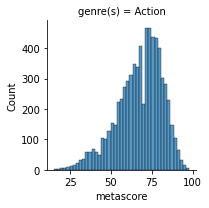

In [ ]:
g1 = sns.FacetGrid(df_action, col = 'genre(s)')
g1.map(sns.histplot, 'metascore')
plt.show()

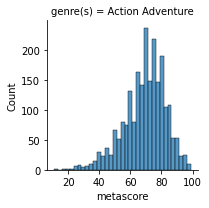

In [ ]:
g2 = sns.FacetGrid(df_action_adv, col = 'genre(s)')
g2.map(sns.histplot, 'metascore')
plt.show()

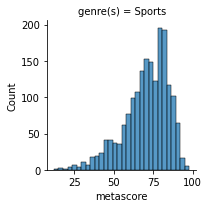

In [ ]:
g3 = sns.FacetGrid(df_sports, col = 'genre(s)')
g3.map(sns.histplot, 'metascore')
plt.show()

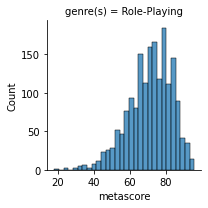

In [ ]:
g4 = sns.FacetGrid(df_role, col = 'genre(s)')
g4.map(sns.histplot, 'metascore')
plt.show()

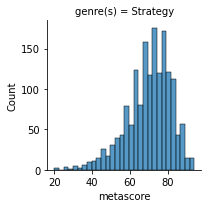

In [ ]:
g5 = sns.FacetGrid(df_strat, col = 'genre(s)')
g5.map(sns.histplot, 'metascore')
plt.show()